# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [3]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/metadata/data_extraction_redone_master.csv'

In [4]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/review_pyper/figures/mansucript_figures/raws/data_extraction_redone'

In [5]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=None)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,Unnamed__0,ch_case,ch_confounding_disease,ch_retro_antero,ch_measurement,ch_disproportionate_amnesia,ch_neuroimaging,ch_neurodegeneration,ch_atypical_memory,ch_english,...,gpt_english,gpt_bias,gpt_hpi,gpt_workup,gpt_attribution,gpt_extended_history,gpt_temporal_history,gpt_neuroimaging_at_onset,gpt_replicability,gpt_lnm
0,A Case of Amnestic Syndrome Caused by a Subcor...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,0,0,1,1,1,1
1,A Case of Borrowed Identity Syndrome after Sev...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1,1,1,1,0,1,0,1,0
2,A CONTRIBUTION TO THE ANATOMICAL BASIS OF THAL...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,1,1,0,0,0,1,1
3,A CONTRIBUTION TO THE ANATOMICAL BASIS OF THAL...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,1,1,0,0,0,1,1
4,Acute Amnesia Due to Isolated Mammillary Body ...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Severe Amnesia after a Restricted Lesion in th...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,0,0,0
96,Severe Amnesia Following a Unilateral Temporal...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,0,0,1,1,1,1
97,Severe Amnesia Following Bilateral Medial Temp...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,0,0,0
98,Severe Amnesic Syndrome and Collecting Behavio...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,1,1,1


In [6]:
data_df = data_df.fillna(value=1)
data_df

,Unnamed__0,ch_case,ch_confounding_disease,ch_retro_antero,ch_measurement,ch_disproportionate_amnesia,ch_neuroimaging,ch_neurodegeneration,ch_atypical_memory,ch_english,...,gpt_english,gpt_bias,gpt_hpi,gpt_workup,gpt_attribution,gpt_extended_history,gpt_temporal_history,gpt_neuroimaging_at_onset,gpt_replicability,gpt_lnm
0,A Case of Amnestic Syndrome Caused by a Subcor...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,0,0,1,1,1,1
1,A Case of Borrowed Identity Syndrome after Sev...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1,1,1,1,0,1,0,1,0
2,A CONTRIBUTION TO THE ANATOMICAL BASIS OF THAL...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,1,1,0,0,0,1,1
3,A CONTRIBUTION TO THE ANATOMICAL BASIS OF THAL...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,1,1,0,0,0,1,1
4,Acute Amnesia Due to Isolated Mammillary Body ...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Severe Amnesia after a Restricted Lesion in th...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,0,0,0
96,Severe Amnesia Following a Unilateral Temporal...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,0,0,1,1,1,1
97,Severe Amnesia Following Bilateral Medial Temp...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,0,0,0
98,Severe Amnesic Syndrome and Collecting Behavio...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,1,1,1,0,1,1,1,1


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [6]:
data_df.columns

Index(['Unnamed__0', 'ch_case', 'ch_retro_antero', 'ch_confounding_disease',
       'ch_measurement', 'ch_disproportionate_amnesia', 'ch_neuroimaging',
       'ch_neurodegeneration', 'ch_atypical_memory', 'ch_english', 'ch_bias',
       'ch_hpi', 'ch_workup', 'ch_attribution', 'ch_extended_history',
       'ch_temporal_history', 'ch_neuroimaging_at_onset', 'ch_replicability',
       'ch_lnm', 'gpt_case', 'gpt_retro_antero', 'gpt_confounding_disease',
       'gpt_measurement', 'gpt_disproportionate_amnesia', 'gpt_neuroimaging',
       'gpt_neurodegeneration', 'gpt_atypical_memory', 'gpt_english',
       'gpt_bias', 'gpt_hpi', 'gpt_workup', 'gpt_attribution',
       'gpt_extended_history', 'gpt_temporal_history',
       'gpt_neuroimaging_at_onset', 'gpt_replicability', 'gpt_lnm'],
      dtype='object')

In [ ]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

# 02 - Compare Accuracy of Classifications

In [18]:
import os
from math import pi

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix

class BinaryDataMetricsPlotter:
    def __init__(self, dataframe, mapping_dict):
        """
        Initialize with a dataframe containing binary data and a dictionary mapping columns.
        """
        self.dataframe = dataframe
        self.mapping_dict = mapping_dict

    def calculate_metrics(self):
        metrics = {}
        for old_col, new_col in self.mapping_dict.items():
            tn, fp, fn, tp = confusion_matrix(self.dataframe[old_col], self.dataframe[new_col]).ravel()
            
            sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Positive Predictive Value
            npv = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value
            acc = accuracy_score(self.dataframe[old_col], self.dataframe[new_col])
            precision, recall, f1, _ = precision_recall_fscore_support(self.dataframe[old_col], self.dataframe[new_col], average='binary')

            metrics[(old_col, new_col)] = {
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Precision': precision,
                'PPV': ppv,
                'NPV': npv,
                'Accuracy': acc,
                'F1 Score': f1
            }
        return metrics
    
    def plot_radar_charts(self, metrics, save_dir, specified_metrics=None):
        if specified_metrics is None:
            specified_metrics = ['Sensitivity', 'Specificity', 'Precision', 'PPV', 'NPV', 'Accuracy', 'F1 Score']
        num_plots = len(metrics)
        color_map = ['purple', 'green', 'blue', 'orange', 'red', 'brown', 'pink']  # More colors for more plots

        for idx, ((old_col, new_col), metric_values) in enumerate(metrics.items()):
            plt.figure(figsize=(6, 6))
            ax = plt.subplot(111, polar=True)

            categories = specified_metrics
            N = len(categories)

            angles = [n / float(N) * 2 * pi for n in range(N)]
            angles += angles[:1]

            ax.set_theta_offset(pi / 2)
            ax.set_theta_direction(-1)

            plt.xticks(angles[:-1], categories)

            ax.set_rlabel_position(0)
            plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="black", size=12)
            plt.ylim(0,1)

            values = [metric_values[metric] for metric in specified_metrics]
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'{old_col} to {new_col}', color=color_map[2])

            plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
            plt.title(f'Metrics for "{old_col} to {new_col}"', size=15, color='black', y=1.1)

            radar_plots_subdir = "radar_plots"
            os.makedirs(os.path.join(save_dir, radar_plots_subdir), exist_ok=True)

            file_name_png = f"{old_col}_to_{new_col}_radar.png"
            file_name_svg = f"{old_col}_to_{new_col}_radar.svg"
            path_png = os.path.join(save_dir, radar_plots_subdir, file_name_png)
            path_svg = os.path.join(save_dir, radar_plots_subdir, file_name_svg)

            plt.savefig(path_png, format='png')
            plt.savefig(path_svg, format='svg')
            plt.show()

            plt.close()

    def plot_metrics(self, metrics, specified_metrics=None, save_dir=None):
        print(metrics)
        if specified_metrics is None:
            specified_metrics = ['Sensitivity', 'Specificity', 'Precision', 'PPV', 'NPV', 'Accuracy', 'F1 Score']

        plot_data = []
        for (old_col, new_col), metric_values in metrics.items():
            for metric_name, metric_value in metric_values.items():
                if metric_name in specified_metrics:
                    plot_data.append({
                        'Mapping': f'{old_col} to {new_col}',
                        'Metric': metric_name,
                        'Value': metric_value
                    })

        plot_df = pd.DataFrame(plot_data)

        # Create the plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Value", y="Mapping", hue="Metric", data=plot_df)

        plt.xlabel('Metric Value')
        plt.ylabel('Column Mapping')
        plt.title('Performance Metrics for Each Column Mapping')

        plt.legend()
        plt.tight_layout()
        if save_dir is not None:
            subdir = "bar_plots"
            os.makedirs(os.path.join(save_dir, subdir), exist_ok=True)

            file_name_png = f"{old_col}_to_{new_col}_bar.png"
            file_name_svg = f"{old_col}_to_{new_col}_bar.svg"
            path_png = os.path.join(save_dir, subdir, file_name_png)
            path_svg = os.path.join(save_dir, subdir, file_name_svg)
            plt.savefig(path_png, format='png')
            plt.savefig(path_svg, format='svg')

        plt.show()
    
    @staticmethod
    def convert_metrics_to_dataframe(metrics_dict):
        """
        Converts the provided metrics dictionary into a pandas DataFrame.

        Args:
        metrics_dict (dict): A dictionary where each key is a tuple containing two strings
                            (categories) and each value is another dictionary containing
                            various metrics.

        Returns:
        pandas.DataFrame: A DataFrame with the metrics organized in columns and categories in rows.
        """
        import pandas as pd

        # Convert the dictionary to a DataFrame
        df = pd.DataFrame(metrics_dict).T

        # Setting the names for the multi-index and resetting it to make it part of the DataFrame
        df.columns.name = 'Metric'
        df.index.set_names(['Category', 'Subcategory'], inplace=True)
        df.reset_index(inplace=True)

        return df



In [8]:
data_df.columns

Index(['Unnamed__0', 'ch_case', 'ch_confounding_disease', 'ch_retro_antero',
       'ch_measurement', 'ch_disproportionate_amnesia', 'ch_neuroimaging',
       'ch_neurodegeneration', 'ch_atypical_memory', 'ch_english', 'ch_bias',
       'ch_hpi', 'ch_workup', 'ch_attribution', 'ch_extended_history',
       'ch_temporal_history', 'ch_neuroimaging_at_onset', 'ch_replicability',
       'ch_lnm', 'gpt_case', 'gpt_confounding_disease', 'gpt_retro_antero',
       'gpt_measurement', 'gpt_disproportionate_amnesia', 'gpt_neuroimaging',
       'gpt_neurodegeneration', 'gpt_atypical_memory', 'gpt_english',
       'gpt_bias', 'gpt_hpi', 'gpt_workup', 'gpt_attribution',
       'gpt_extended_history', 'gpt_temporal_history',
       'gpt_neuroimaging_at_onset', 'gpt_replicability', 'gpt_lnm'],
      dtype='object')

How to Use the Mapping Dictionary
- The mapping dictionary is a crucial component of the BinaryDataMetricsPlotter class. It defines the relationships between columns in your dataframe that you want to compare. Here's how to use it:

- Define the Mapping: Create a dictionary where each key-value pair represents a mapping of the columns of ground-truth classification to the column of the experimental classificaiton. 

>mapping_dict = {
>>    'gold_standard_1': 'classification_1',
>>
>>    'gold_standard_2': 'classification_2',
>>
>>    add more as needed
>>
>}

In [52]:
mapping_dict = {'ch_case':'gpt_case', 
                'ch_retro_antero':'gpt_retro_antero', 
                'ch_confounding_disease':'gpt_confounding_disease',
                'ch_measurement':'gpt_measurement',
                'ch_disproportionate_amnesia':'gpt_disproportionate_amnesia', 
                'ch_neuroimaging':'gpt_neuroimaging',
                'ch_neurodegeneration':'gpt_neurodegeneration', 
                'ch_atypical_memory':'gpt_atypical_memory', 
                'ch_english':'gpt_english', 
                'ch_bias':'gpt_bias',
                'ch_hpi':'gpt_hpi', 
                'ch_workup':'gpt_workup', 
                'ch_attribution':'gpt_attribution', 
                'ch_extended_history':'gpt_extended_history',
                'ch_temporal_history':'gpt_temporal_history', 
                'ch_neuroimaging_at_onset':'gpt_neuroimaging_at_onset', 
                'ch_replicability':'gpt_replicability',
                'ch_lnm':'gpt_lnm'}

**Visualize Classification Metrics with Barplots**

- Sensitivity (Recall): Measures the proportion of actual positives correctly identified. Identical to recall, it assesses how well the model identifies true positives among the positive cases.

- Specificity: Indicates the proportion of actual negatives correctly identified as such. It evaluates the model's ability to recognize true negatives among negative cases.

- Precision: Refers to the proportion of positive identifications that are actually correct. It focuses on the accuracy of the positive predictions made by the model.

- Recall: Measures the proportion of actual positives that are correctly identified. This is identical to sensitivity, emphasizing the model's accuracy in detecting positive cases.

- Accuracy: The ratio of correctly predicted observations to the total observations. It provides an overall measure of the model's performance.

- F1 Score: The harmonic mean of precision and recall. This metric is particularly useful when the balance between precision and recall is important.

- Positive Predictive Value (PPV): Similar to precision, PPV is the proportion of positive test results that are true positives. It indicates the likelihood that a positive test accurately reflects the underlying condition.

- Negative Predictive Value (NPV): The proportion of negative test results that are true negatives. NPV measures the likelihood that a negative test result accurately indicates the absence of the condition.

Edit the List with the Specific Metrics You Would Like to Display
- Set to None to display all metrics

In [1]:
specified_metrics = ['Accuracy']

Run It

In [2]:
plotter = BinaryDataMetricsPlotter(data_df, mapping_dict)
metrics = plotter.calculate_metrics()
plot_df = plotter.plot_metrics(metrics, specified_metrics=specified_metrics, save_dir=out_dir)

NameError: name 'BinaryDataMetricsPlotter' is not defined

**View Classification Metrics With Radar Plots**

How to Use the Mapping Dictionary
- The mapping dictionary is a crucial component of the BinaryDataMetricsPlotter class. It defines the relationships between columns in your dataframe that you want to compare. Here's how to use it:

- Define the Mapping: Create a dictionary where each key-value pair represents a mapping of the columns of ground-truth classification to the column of the experimental classificaiton. 

>mapping_dict = {
>>    'gold_standard_1': 'classification_1',
>>
>>    'gold_standard_2': 'classification_2',
>>
>>    add more as needed
>>
>}

In [9]:
data_df.columns

Index(['Unnamed__0', 'ch_case', 'ch_confounding_disease', 'ch_retro_antero',
       'ch_measurement', 'ch_disproportionate_amnesia', 'ch_neuroimaging',
       'ch_neurodegeneration', 'ch_atypical_memory', 'ch_english', 'ch_bias',
       'ch_hpi', 'ch_workup', 'ch_attribution', 'ch_extended_history',
       'ch_temporal_history', 'ch_neuroimaging_at_onset', 'ch_replicability',
       'ch_lnm', 'gpt_case', 'gpt_confounding_disease', 'gpt_retro_antero',
       'gpt_measurement', 'gpt_disproportionate_amnesia', 'gpt_neuroimaging',
       'gpt_neurodegeneration', 'gpt_atypical_memory', 'gpt_english',
       'gpt_bias', 'gpt_hpi', 'gpt_workup', 'gpt_attribution',
       'gpt_extended_history', 'gpt_temporal_history',
       'gpt_neuroimaging_at_onset', 'gpt_replicability', 'gpt_lnm'],
      dtype='object')

In [10]:
mapping_dict = {'ch_case':'gpt_case', 
                'ch_retro_antero':'gpt_retro_antero', 
                'ch_confounding_disease':'gpt_confounding_disease',
                'ch_measurement':'gpt_measurement',
                'ch_disproportionate_amnesia':'gpt_disproportionate_amnesia', 
                'ch_neuroimaging':'gpt_neuroimaging',
                'ch_neurodegeneration':'gpt_neurodegeneration', 
                'ch_atypical_memory':'gpt_atypical_memory', 
                'ch_english':'gpt_english', 
                'ch_bias':'gpt_bias',
                'ch_hpi':'gpt_hpi', 
                'ch_workup':'gpt_workup', 
                'ch_attribution':'gpt_attribution', 
                'ch_extended_history':'gpt_extended_history',
                'ch_temporal_history':'gpt_temporal_history', 
                'ch_neuroimaging_at_onset':'gpt_neuroimaging_at_onset', 
                'ch_replicability':'gpt_replicability',
                'ch_lnm':'gpt_lnm'}

Edit the List with the Specific Metrics You Would Like to Display
- Set to None to display all metrics

In [11]:
specified_metrics = None


Run it

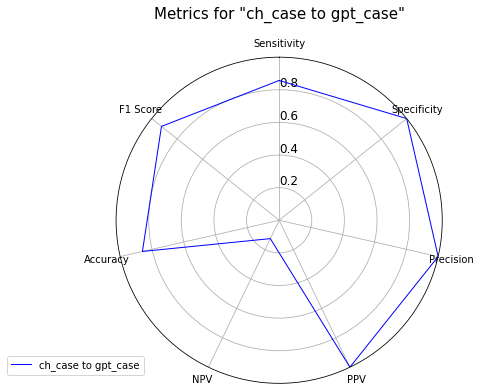

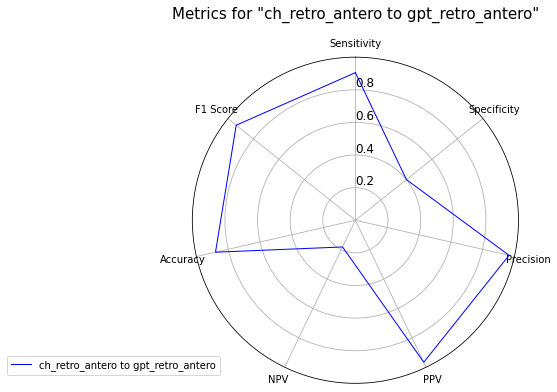

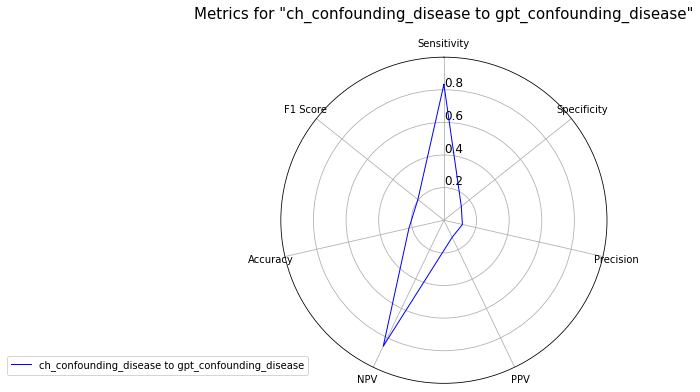

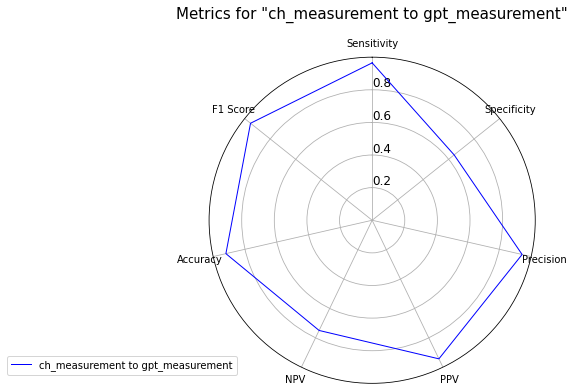

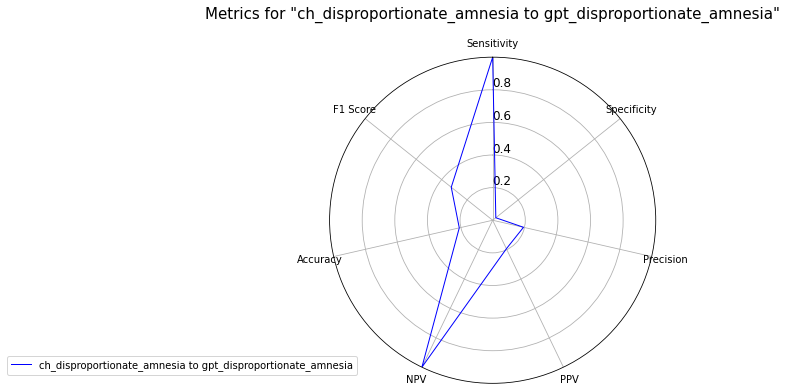

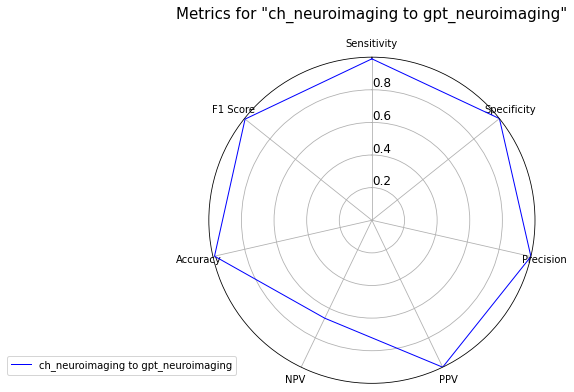

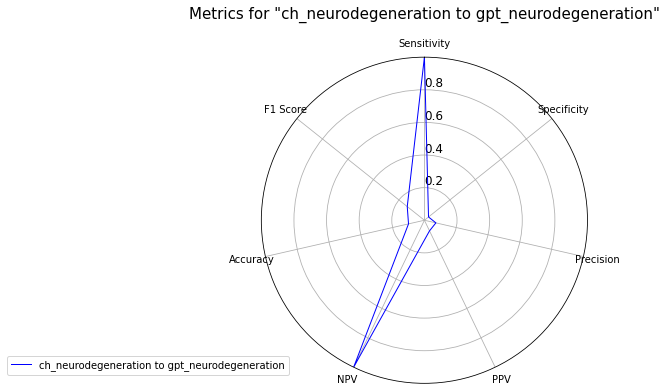

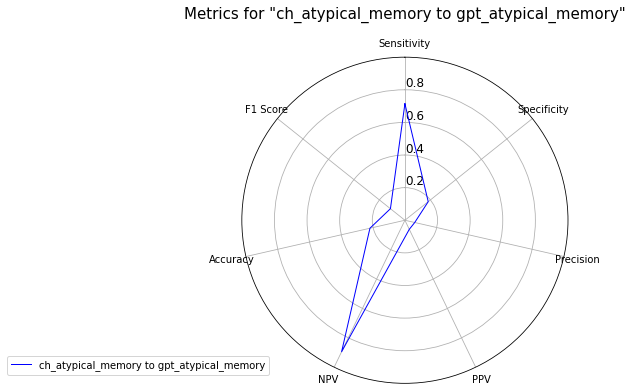

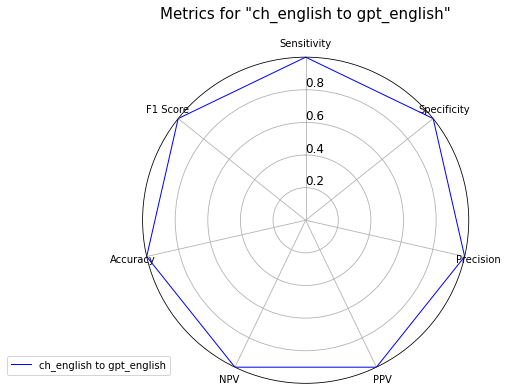

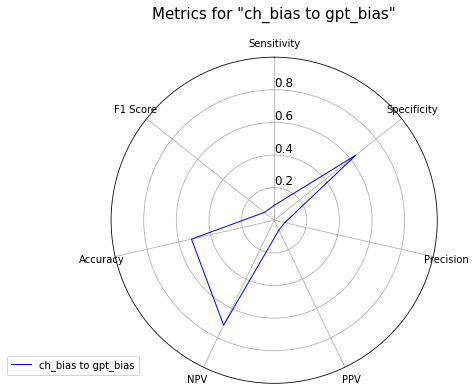

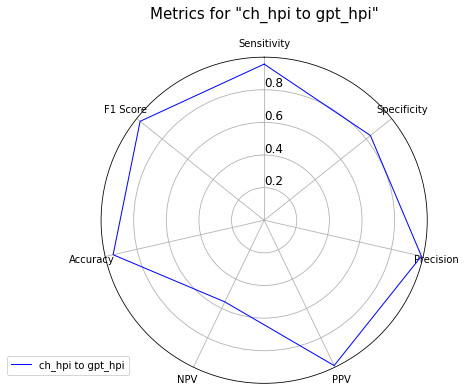

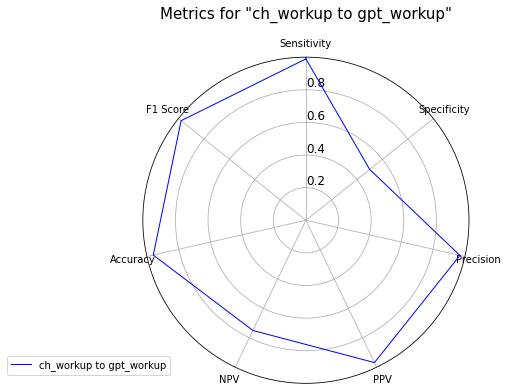

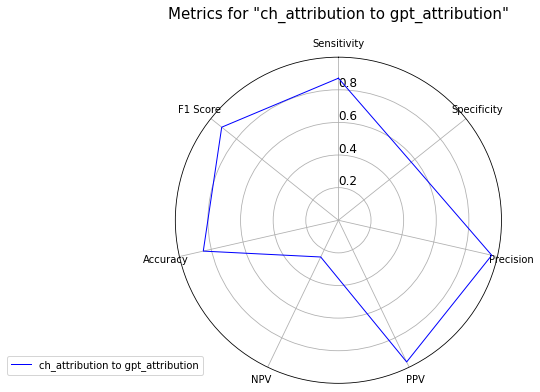

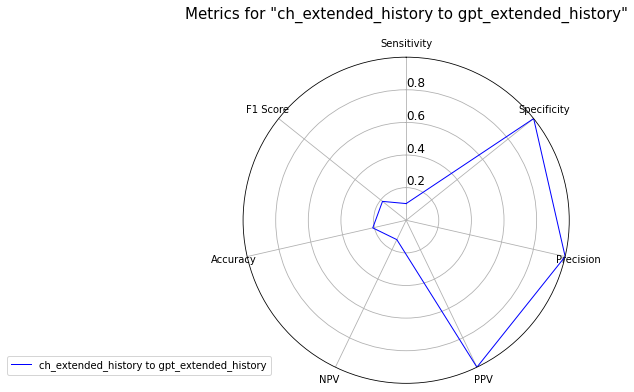

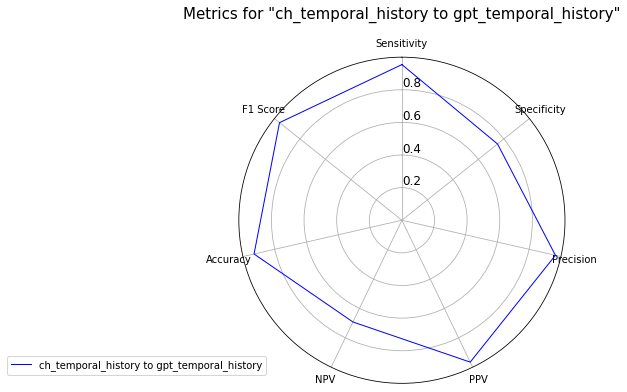

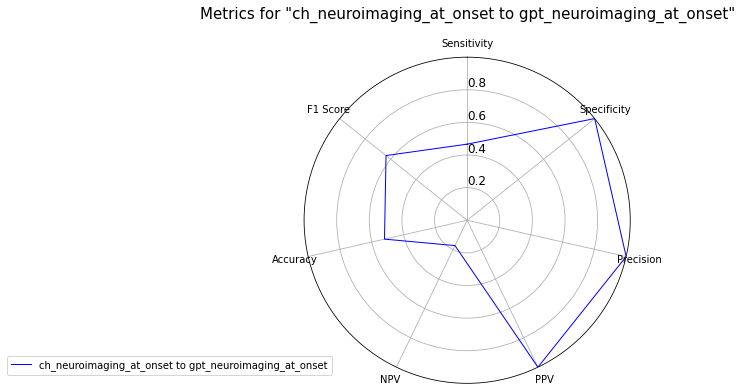

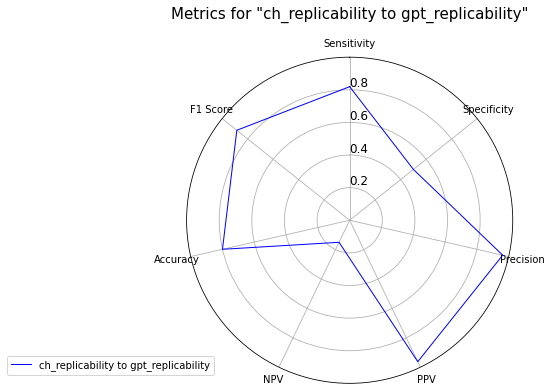

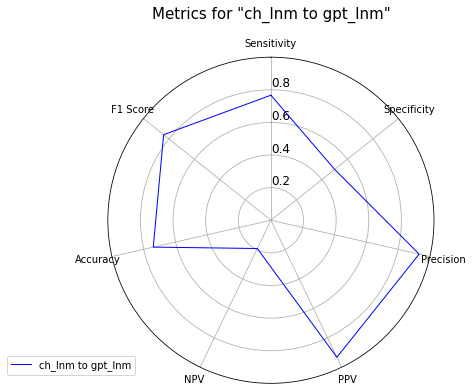

In [12]:
plotter = BinaryDataMetricsPlotter(data_df, mapping_dict)
metrics = plotter.calculate_metrics()
plot_df = plotter.plot_radar_charts(metrics, specified_metrics=specified_metrics, save_dir=out_dir)

Visualize the Results in a Dataframe

In [20]:
df = BinaryDataMetricsPlotter.convert_metrics_to_dataframe(metrics)
df.to_csv(out_dir+'/metrics.csv')
df

Metric,Category,Subcategory,Sensitivity,Specificity,Precision,PPV,NPV,Accuracy,F1 Score
0,ch_case,gpt_case,0.857143,1.000000,1.000000,1.000000,0.125000,0.86,0.923077
1,ch_retro_antero,gpt_retro_antero,0.905263,0.400000,0.966292,0.966292,0.181818,0.88,0.934783
2,ch_confounding_disease,gpt_confounding_disease,0.833333,0.136364,0.116279,0.116279,0.857143,0.22,0.204082
3,ch_measurement,gpt_measurement,0.965116,0.642857,0.943182,0.943182,0.750000,0.92,0.954023
4,ch_disproportionate_amnesia,gpt_disproportionate_amnesia,1.000000,0.024691,0.193878,0.193878,1.000000,0.21,0.324786
5,ch_neuroimaging,gpt_neuroimaging,0.989796,1.000000,1.000000,1.000000,0.666667,0.99,0.994872
6,ch_neurodegeneration,gpt_neurodegeneration,1.000000,0.032258,0.072165,0.072165,1.000000,0.10,0.134615
7,ch_atypical_memory,gpt_atypical_memory,0.714286,0.182796,0.061728,0.061728,0.894737,0.22,0.113636
8,ch_english,gpt_english,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
9,ch_bias,gpt_bias,0.090909,0.641026,0.066667,0.066667,0.714286,0.52,0.076923
